In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("dog_data_09032022.csv")
df.tail(3)

,Unnamed: 0,dog,height,weight,life,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,...,Barking Level,Mental Stimulation Needs,popularity_rank,color,marking,health,grooming,excercise,training,nutrition
280,280,xoloitzcuintli,~10-14 inches (toy)~14-18 inches (miniature)~1...,~10-15 pounds (toy)~15-30 pounds (miniature)~3...,13-18 years,5,3,3,1,1,...,3,4,119 of 1,Black-Black & White-Black White & Tan-Brindle-...,Spotted-White Markings-Tan Markings-Black Mark...,Owning a dog is not just a privilege; it’s a r...,"Xolos are generally healthy dogs, and responsi...","Coated Xolos have an easy-care short coat, req...","Xolos like long walks and upbeat play, but the...",Xolos need a consistent training regimen and c...
281,281,yakutian-laika,~21-23 inches,~40-55 pounds,10-12 years,5,5,4,4,2,...,4,5,NaN,Black & White-Brown & White-Gray & White-White...,Black Markings-Tri-Colored-Buff Markings,Owning a dog is not just a privilege; it’s a r...,"The Yakutian Laika is a hardy breed, and to ke...",The Yakutian Laika experiences seasonal sheddi...,The Yakutian Laika is a sled dog with a well-d...,Training the Yakutian Laika is a rather pleasa...
282,282,yorkshire-terrier,~7-8 inches,~7 pounds,11-15 years,5,5,3,1,5,...,4,4,13 of 1,Black & Tan-Blue & Gold-Blue & Tan-Black & Gold,NaN,Owning a dog is not just a privilege; it’s a r...,"Yorkshire Terriers are generally healthy dogs,...",The Yorkshire Terrier's coat is very similar t...,Even small dogs require exercise to stay healt...,"Yorkies love their owners, and are very intell..."


In [37]:
name_original_list = df.dog
df[df.dog == 'australian-kelpie']

,Unnamed: 0,dog,height,weight,life,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,...,Barking Level,Mental Stimulation Needs,popularity_rank,color,marking,health,grooming,excercise,training,nutrition
17,17,australian-kelpie,~17-20 inches,NaN,10-13 years,3,3,3,3,1,...,1,4,NaN,Black-Black & Tan-Blue-Chocolate-Fawn-Red-Red ...,NaN,Owning a dog is not just a privilege; it’s a r...,Most Australian Kelpies are healthy dogs. Work...,\n\n\n\n\n\n\n\n The Australian Kelpie has a d...,Australian Kelpies need a lot of exercise to b...,"Training for dog sports like agility, obedienc..."


## Data Cleaning
- Drop unneccsary columns
- Clean height
    - drop all Nan Rows
    - Choose one unit, male and standard
    

In [10]:
# Let's tackle one column after another
# drop first unnamed column
df = df.drop(df.columns[0], axis=1)
df.tail(2)
print(df.shape)

(283, 28)


In [11]:
df['temp'] = df.height.apply(lambda x: len(str(x).split('~')))

In [12]:
# remove all Nan rows
print(df.shape)
df = df[df['height'].notna()]
print(df.shape)

(283, 29)
(273, 29)


## Height Cleaning

In [13]:
# we want to get regular, male, standard
def height_separate(height_str):
    height_str = height_str.lower()
    if 'male' in height_str:
        height_str = height_str.split('(male')[0]
    elif 'standard' in height_str:
        height_str_list = height_str.split('~')
        for height_str_iter in height_str_list:
            if '(standard)' in height_str_iter:
                height_str = height_str_iter
        height_str = height_str.split('(standard)')[0]
        
    # remove inches
    height_str = height_str.replace('inches',"")
    height_str = height_str.replace('pounds',"")
    height_str = height_str.replace('~',"")
        
    return height_str

def height_str_to_val(height_str):
    height_str = height_str.split('-')
    height_val_list = []
    for height_digit in height_str:
        try: 
            height_val = float(height_digit)
            height_val_list.append(height_val)
        except:
            return height_str
    return sum(height_val_list) / len(height_val_list)

In [14]:
df['height'] = df.height.apply(lambda x : height_separate(x))

In [15]:
df['height'] = df.height.apply(lambda x : height_str_to_val(x))

In [16]:
idx_list = []
for i,h in zip(df.index,df.height):
    if type(h) is not float:
        idx_list.append(i)
        print(h)
print(idx_list)

['20 1/2 ', ' 22  ']
['up to 15 ']
['13  & under13', '15 under 20  (13  & under)20', '30  (13', '15 )']
['28  & up ']
['minimum: 25.5', '27.5 ']
['minimum: 23.5', '25.5 ']
['32  minimum ']
['27.5 minimum  ']
['30  & up ']
['28  (average male)26  (average female)']
['22  & up ']
['9.75', '15.75  (small) 15.75', '19.75  (medium) 19.75', '25.75  (large)']
['over 15  ']
['no more than 10 ']
['22', '28  (large) 16', '22  (medium)']
['males 30', '31 females 25', '30 ']
['19.5 ', ' 24.5  males19 ', ' 24  females']
['15½ ']
['minimum 28', '35 ']
['minimum 26  ']
['minimum 21.5', '23.5 ']
['15½ ']
[22, 26, 28, 50, 73, 88, 141, 154, 168, 177, 185, 192, 200, 201, 203, 212, 232, 245, 247, 259, 263, 276]


In [17]:
df.height.loc[22] = (20.5 + 22) / 2
df.height.loc[26] = 15
df.height.loc[28] = 20
df.height.loc[50] = 28
df.height.loc[73] = (22.5 + 27.5) / 2
df.height.loc[88] = (23.5 + 25.5) / 2
df.height.loc[141] = 32
df.height.loc[154] = 27.5
df.height.loc[168] = 30
df.height.loc[177] = 28
df.height.loc[185] = 22
df.height.loc[192] = (15.75+19.75) / 2
df.height.loc[200] = 15
df.height.loc[201] = 10
df.height.loc[203] = (16 +22) / 2
df.height.loc[212] = 30.5
df.height.loc[232] = (19.5+24.5) / 2
df.height.loc[245] = 15.5
df.height.loc[247] = (28+35) / 2
df.height.loc[259] = 26
df.height.loc[263] = 21.5
df.height.loc[276] = 15.5

/Users/glee2/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Weight Cleaning

In [18]:
# remove all Nan rows
print(df.shape)
df = df[df['weight'].notna()]
print(df.shape)

(273, 29)
(262, 29)


In [19]:
df['weight'] = df.weight.apply(lambda x : height_separate(x))
df['weight'] = df.weight.apply(lambda x : height_str_to_val(x))

In [20]:
idx_list = []
for i,h in zip(df.index,df.weight):
    if type(h) is not float:
        idx_list.append(i)
        print(h)
print(idx_list)

['minimum: 88', '110 ']
['not exceeding 6 ']
['minimum: 44', '57 ']
['110  & up ']
['under 28 ']
['100  & up ']
['100  or more ']
['under 7 ']
['under 12 ']
['up to 14 ']
['up to 30  ']
['8.5', '17.5  (small) 17.5', '26.5  (medium) 26.5', '55  (large)']
['44', '66  (large) 35', '44  (medium)']
['up to 6.5 ']
['around 10 ']
['minimum 55 ']
[73, 76, 88, 96, 112, 126, 154, 165, 167, 189, 190, 192, 203, 222, 238, 265]


In [21]:
df.weight.loc[73] = (88 + 110)/2
df.weight.loc[76] = 6
df.weight.loc[88] = (44 + 57)/2
df.weight.loc[96] = 110
df.weight.loc[112] = 28
df.weight.loc[126] = 100
df.weight.loc[154] = 100
df.weight.loc[165] = 7
df.weight.loc[167] = 12
df.weight.loc[189] = 14
df.weight.loc[190] = 30
df.weight.loc[192] = (17.5+26.5) / 2
df.weight.loc[203] = (35+44) / 2
df.weight.loc[222] = 6.5
df.weight.loc[238] = 10
df.weight.loc[265] = 55

## clean life

In [22]:
def life_cleaning(life_str):
    life_str = life_str.replace('years','')
    life_list = life_str.split('-')
    try:
        life_list = [int(l) for l in life_list]
    except:
        life_list = [0]
    life_avg = sum(life_list) / len(life_list)
    return life_avg

In [23]:
df.life = df.life.apply(lambda x: life_cleaning(x))

In [24]:
# fill in with median life

# 217, 56, 69,73, 244(1214) replace with avg life

life_avg = (df.life.sum() - 1214) / (len(df.life) - 5)
replace_list = [217, 57, 69,73, 244]
for r in replace_list:
    df.life.loc[r] = life_avg
df.life.sort_values()

96      6.5
162     7.0
141     7.0
175     8.0
168     8.0
       ... 
40     16.0
167    16.0
85     17.0
223    17.0
213    18.0
Name: life, Length: 262, dtype: float64

## Trait columns cleaning

/var/folders/ly/yp1zttk15gsc1kxg7rl2plgr0000gn/T/ipykernel_57658/2979420087.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'life'}>,
        <AxesSubplot:title={'center':'Affectionate With Family'}>,
        <AxesSubplot:title={'center':'Good With Young Children'}>,
        <AxesSubplot:title={'center':'Good With Other Dogs'}>],
       [<AxesSubplot:title={'center':'Shedding Level'}>,
        <AxesSubplot:title={'center':'Coat Grooming Frequency'}>,
        <AxesSubplot:title={'center':'Drooling Level'}>,
        <AxesSubplot:title={'center':'Openness To Strangers'}>],
       [<AxesSubplot:title={'center':'Playfulness Level'}>,
        <AxesSubplot:title={'center':'Watchdog/Protective Nature'}>,
        <AxesSubplot:title={'center':'Adaptability Level'}>,
        <AxesSubplot:title={'center':'Trainability Level'}>],
       [<AxesSubplot:title={'center':'Energy Level'}>,
        <AxesSubplot:title={'center':'Barking Level'}>,
        <AxesSubplot:title={'center':'Mental Stimulation Needs'}>,
        <AxesSubplot:title={'center':'temp'}>]], dtype=object)

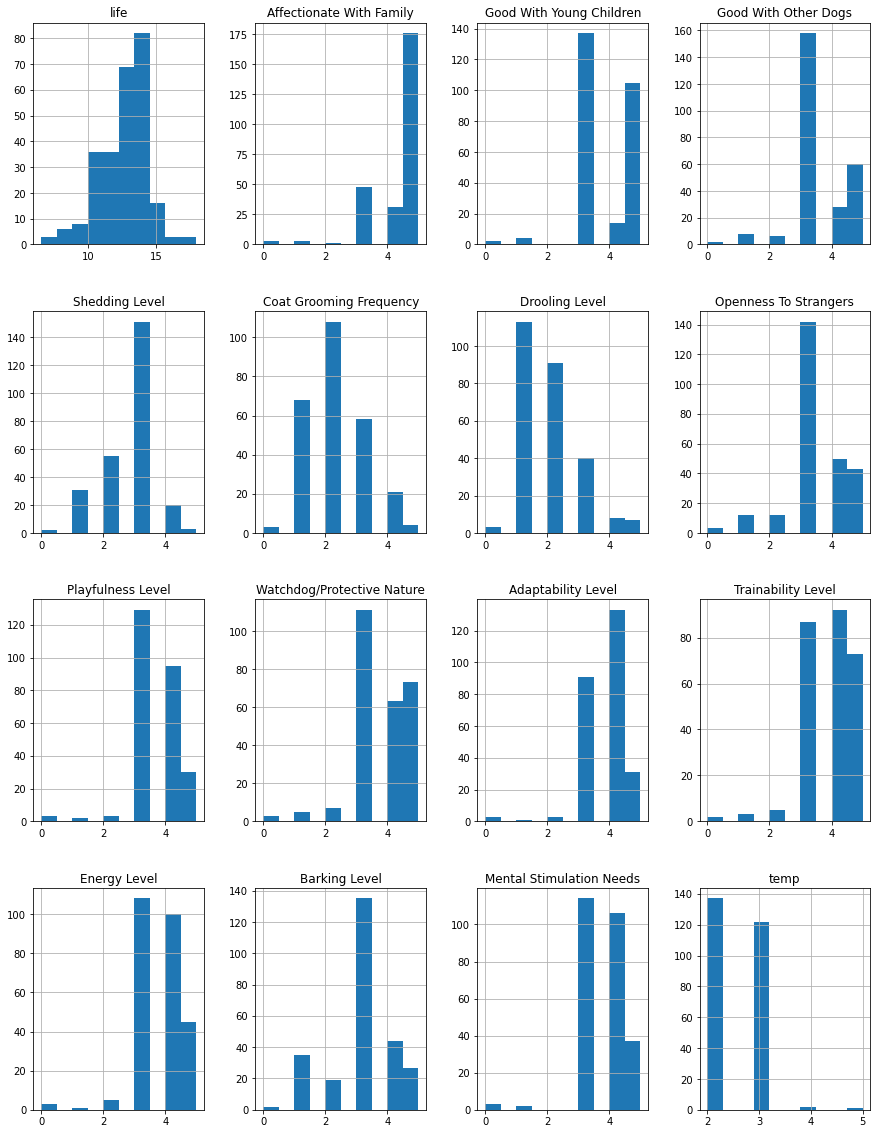

In [25]:
fig = plt.figure(figsize= (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [26]:
trait_cols = ['Affectionate With Family',
       'Good With Young Children', 'Good With Other Dogs', 'Shedding Level',
       'Coat Grooming Frequency', 'Drooling Level', 'Coat Type', 'Coat Length',
       'Openness To Strangers', 'Playfulness Level',
       'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs']

def clean_trait(series):
    idxmax = series.value_counts().idxmax()
    series[series == 0] = idxmax # replace 0 with idxmax
    return series
    
for col in trait_cols:
    df[col] = clean_trait(df[col])

/var/folders/ly/yp1zttk15gsc1kxg7rl2plgr0000gn/T/ipykernel_57658/3646928948.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series == 0] = idxmax # replace 0 with idxmax


/var/folders/ly/yp1zttk15gsc1kxg7rl2plgr0000gn/T/ipykernel_57658/2979420087.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'life'}>,
        <AxesSubplot:title={'center':'Affectionate With Family'}>,
        <AxesSubplot:title={'center':'Good With Young Children'}>,
        <AxesSubplot:title={'center':'Good With Other Dogs'}>],
       [<AxesSubplot:title={'center':'Shedding Level'}>,
        <AxesSubplot:title={'center':'Coat Grooming Frequency'}>,
        <AxesSubplot:title={'center':'Drooling Level'}>,
        <AxesSubplot:title={'center':'Openness To Strangers'}>],
       [<AxesSubplot:title={'center':'Playfulness Level'}>,
        <AxesSubplot:title={'center':'Watchdog/Protective Nature'}>,
        <AxesSubplot:title={'center':'Adaptability Level'}>,
        <AxesSubplot:title={'center':'Trainability Level'}>],
       [<AxesSubplot:title={'center':'Energy Level'}>,
        <AxesSubplot:title={'center':'Barking Level'}>,
        <AxesSubplot:title={'center':'Mental Stimulation Needs'}>,
        <AxesSubplot:title={'center':'temp'}>]], dtype=object)

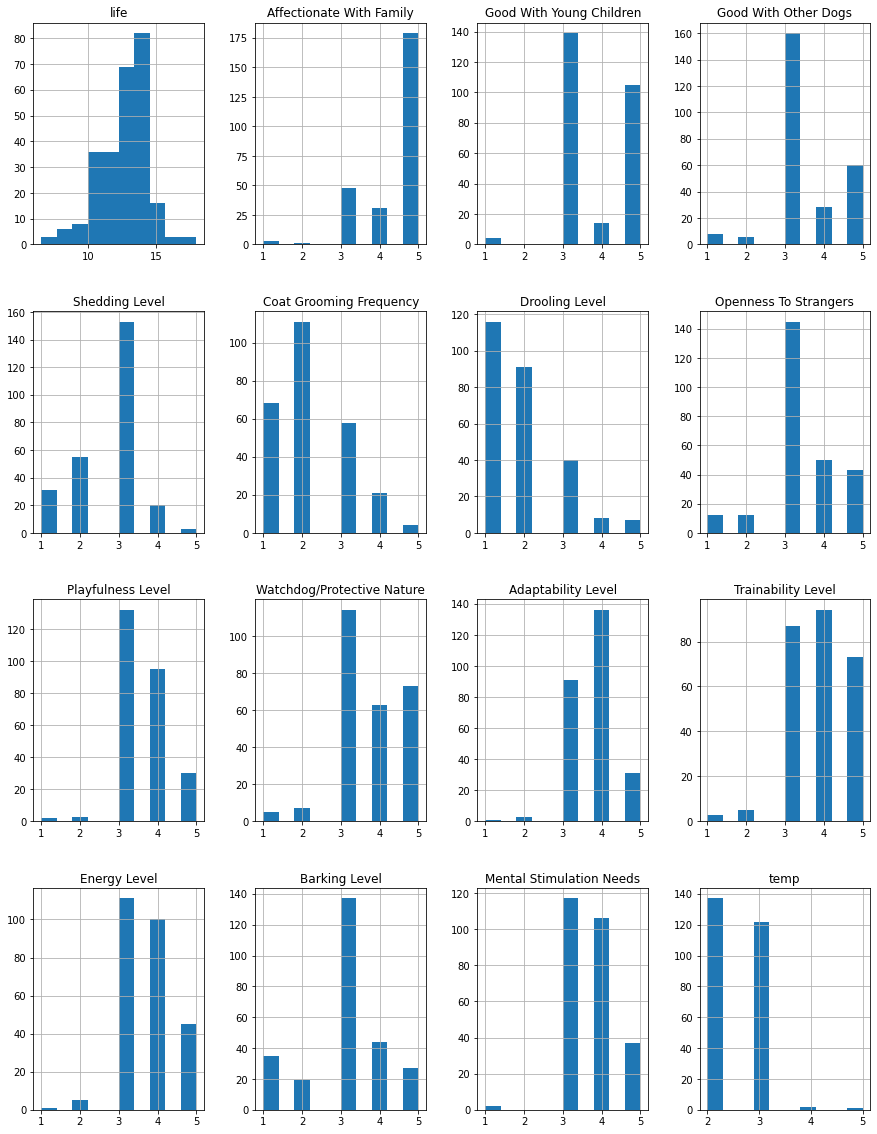

In [27]:
fig = plt.figure(figsize= (15,20))
ax = fig.gca()
df.hist(ax = ax)

## clean popularity rank

In [28]:
df.popularity_rank = df.popularity_rank.apply(lambda x: int(x.replace(' of 1','')) if type(x) == str else x)
df.popularity_rank.sort_values(ascending= False)
# out of 197
# assign all the Nan to be 198th
df.popularity_rank = df.popularity_rank.where(df.popularity_rank >= 1, 198)

## color cleaning

In [29]:
df.color = df.color.apply(lambda x: x.split('-') if type(x) == str else x) 

In [30]:
s = set()
l = []

for c in df.color:
    if type(c) is not list:
        l = l + []
    else:
        l = l + c

for c in df.color:
    if type(c) is list:
        s = s.union(set(c))


print(len(l))
print(len(s))

1969
417


## mark cleaning

In [31]:
df.marking = df.marking.apply(lambda x: x.split('-') if type(x) == str else x) 

In [32]:
s = set()
l = []

for c in df.marking:
    if type(c) is not list:
        l = l + []
    else:
        l = l + c

for c in df.marking:
    if type(c) is list:
        s = s.union(set(c))


print(len(l))
print(len(s))

593
134


In [34]:
df_new_name_list = df.dog

In [35]:
set(name_original_list) - set(df_new_name_list)

{'alaskan-klee-kai',
 'american-leopard-hound',
 'australian-kelpie',
 'australian-stumpy-tail-cattle-dog',
 'barbado-da-terceira',
 'beagle',
 'cane-corso',
 'drentsche-patrijshond',
 'german-spitz',
 'japanese-terrier',
 'jindo',
 'kai-ken',
 'lagotto-romagnolo',
 'mountain-cur',
 'nederlandse-kooikerhondje',
 'romanian-carpathian-shepherd',
 'romanian-mioritic-shepherd-dog',
 'segugio-italiano',
 'slovakian-wirehaired-pointer',
 'spinone-italiano',
 'toy-fox-terrier'}

In [ ]:
df.to_csv('dog_data_clean.csv')